In [1]:
import numpy as np
import math
import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
iris = pd.read_csv('iris.data', names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class'])
encoding = {"class":     {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}}
iris = iris.replace(encoding)

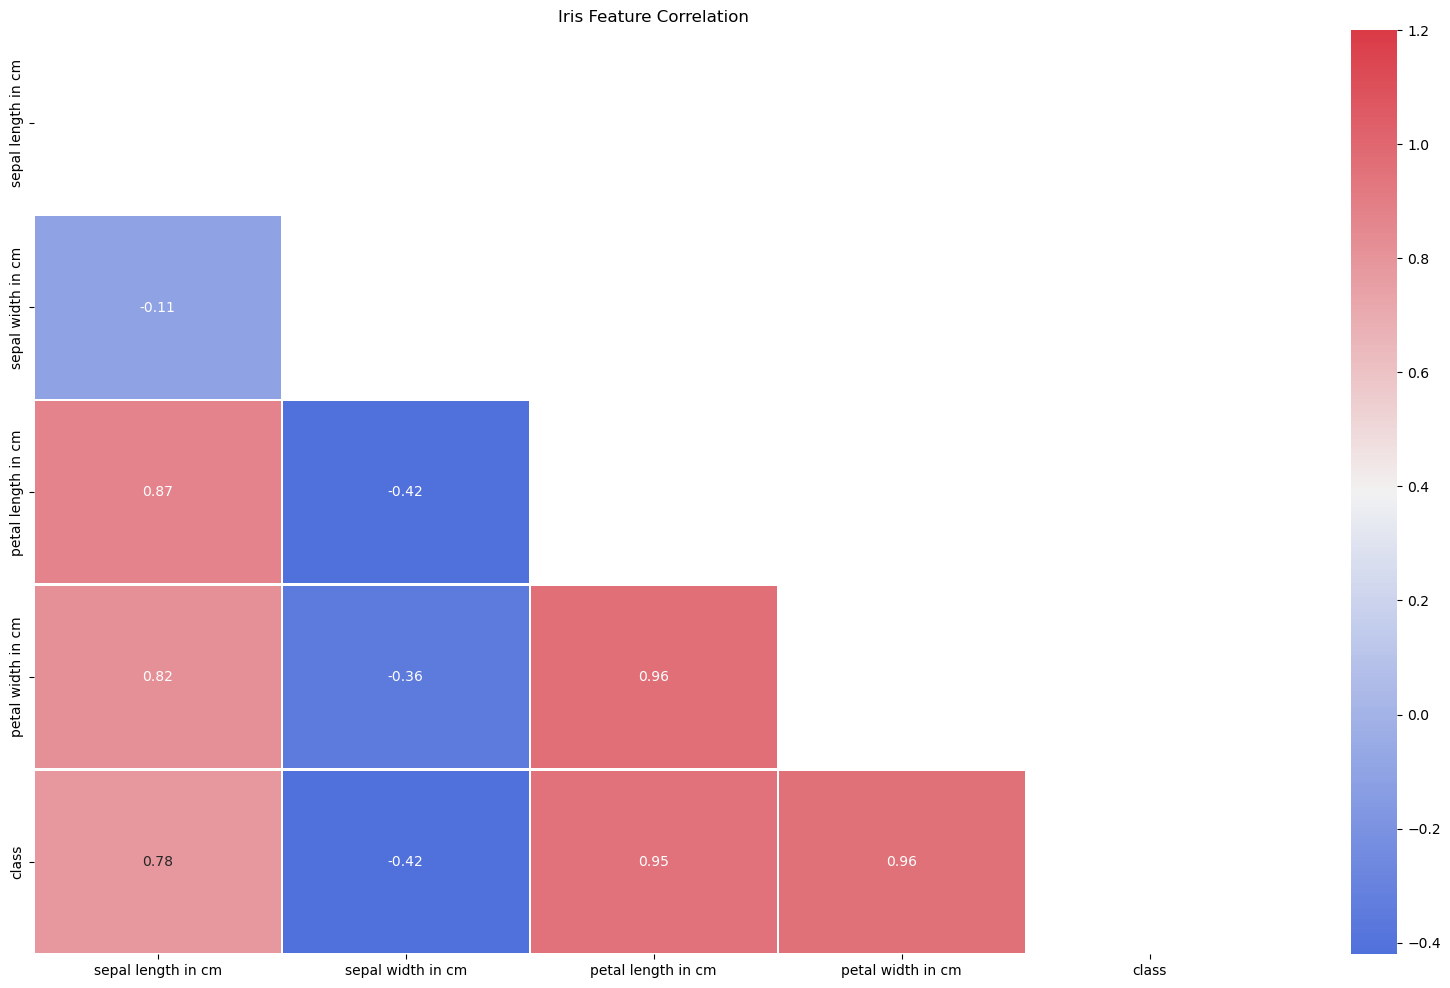

In [3]:
#Feature Selection - seems like sepal width will have less predictive power. Online I found methods such as Variance Threshold that eliminated sepal width too. It's probably the case that because there are so few features we don't really need to do feature selection
corrMatt = iris.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Iris Feature Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [4]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris.drop(['class'], axis=1) #drop class, but also sepal width as chosen by feature selection

# converting into numpy array
X = X.values
y = iris['class'].values

In [5]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

#Standardise. I think it is better to standardise after split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [7]:
model.score(X_train, y_train)

0.9714285714285714

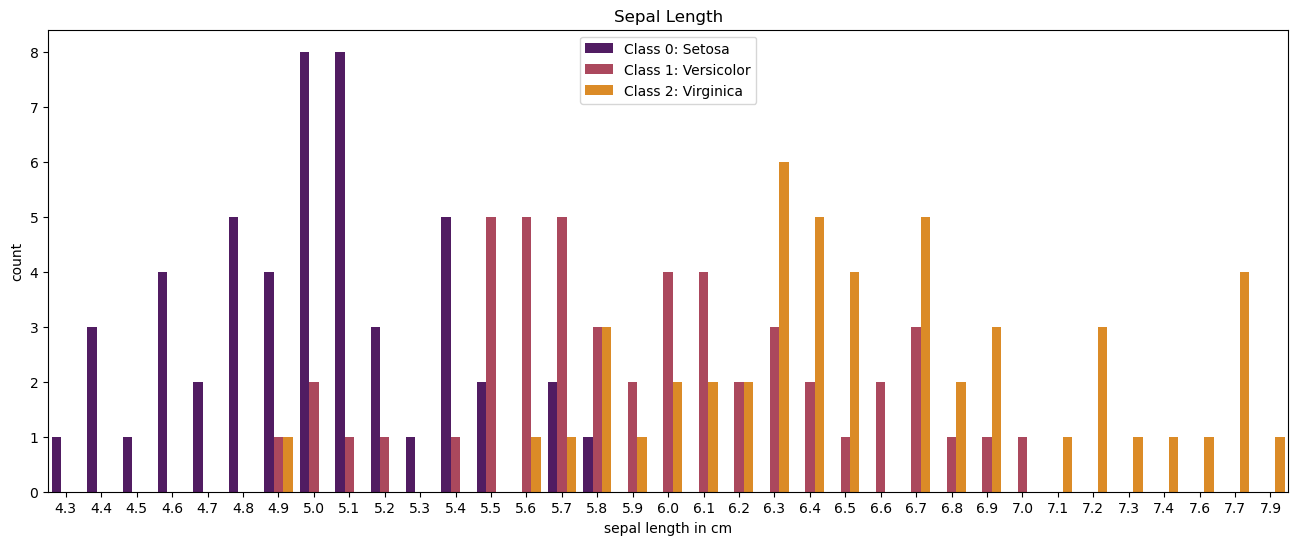

In [8]:
plt.figure(figsize = (16,6))
sns.countplot(x = iris['sepal length in cm'], hue = iris['class'], palette = 'inferno').set(title = 'Sepal Length')
plt.legend(labels = ['Class 0: Setosa', 'Class 1: Versicolor', 'Class 2: Virginica'])


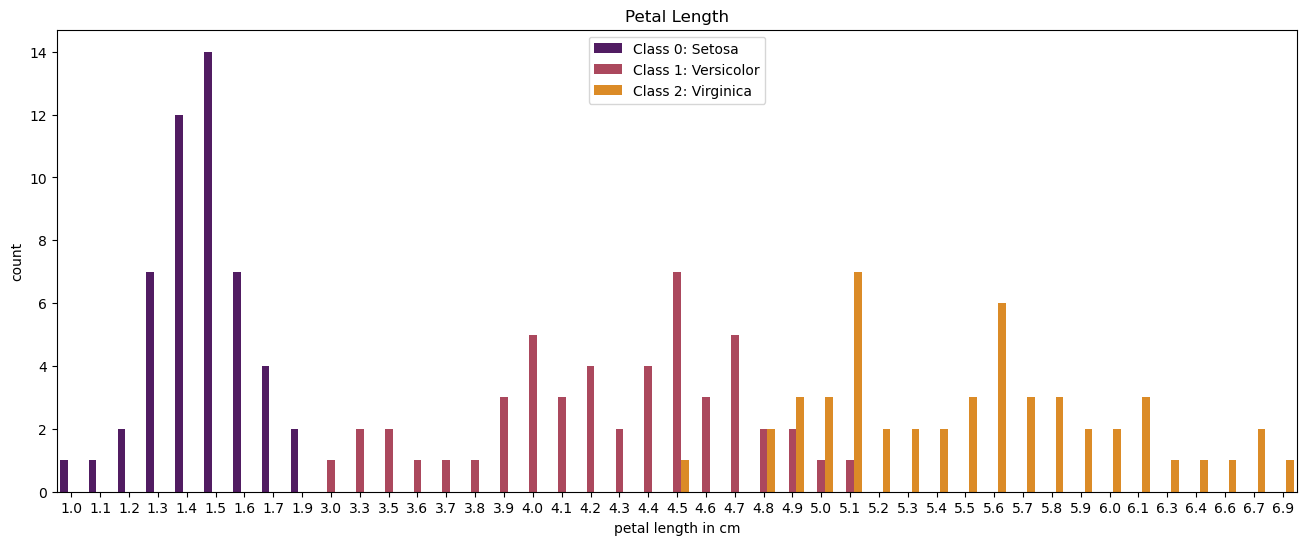

In [9]:
plt.figure(figsize = (16,6))
sns.countplot(x = iris['petal length in cm'], hue = iris['class'], palette = 'inferno').set(title = 'Petal Length')
plt.legend(labels = ['Class 0: Setosa', 'Class 1: Versicolor', 'Class 2: Virginica'])


In [10]:
iris

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
iris.isnull().sum()
#shows have no missing values

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
X = iris.drop(['class'], axis=1)

# converting into numpy array
X = X.values
y = iris['class'].values

In [14]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [15]:
#Standardise. I think it is better to standardise after split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
model.score(X_train, y_train)

0.9714285714285714

In [18]:
predictions = model.predict(X_test) #what input, X_test or X? I think X_test as using validation data
predictions.shape

(45,)

In [19]:
(predictions-y_test) #visualising the error

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [20]:
from sklearn.model_selection import cross_val_score

dict = {}
for fold in range(2,31):
    cv_error = np.average(cross_val_score(model, X, y, cv=fold)) #input is X_train or X? y_train or y? 
    print(fold, cv_error)
    dict[fold]=cv_error

#choose k = 5

2 0.96
3 0.9733333333333333
4 0.9733285917496444
5 0.9733333333333334
6 0.9666666666666667
7 0.9669140383426098
8 0.9671052631578947
9 0.960375816993464
10 0.9733333333333334
11 0.9670329670329672
12 0.9668803418803419
13 0.9737762237762237
14 0.9740259740259739
15 0.9733333333333333
16 0.9729166666666667
17 0.9673202614379084
18 0.9591049382716049
19 0.9736842105263158
20 0.9660714285714287
21 0.9668367346938777
22 0.9675324675324675
23 0.974120082815735
24 0.9732142857142859
25 0.9733333333333334
26 0.9743589743589745
27 0.9740740740740741
28 0.9726190476190476
29 0.9666666666666666
30 0.9666666666666667


In [22]:
n_folds = 26
cv_error = np.average(cross_val_score(model, X, y, cv=n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {}'.format(n_folds, cv_error))

The 26-fold cross-validation accuracy score for this classifier is 0.9743589743589745


Text(0.5, 0, 'Predicted Values')

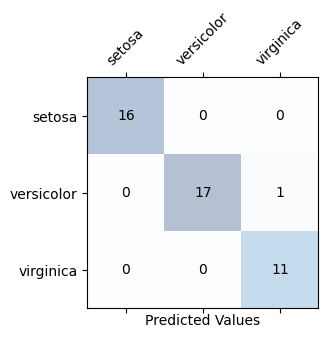

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predictions)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
 for j in range(cm.shape[1]):
     ax.text(x=j, y=i,
         s=cm[i, j], 
         va='center', ha='center')
classes=["setosa","versicolor","virginica"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
